# Fake News Project

1. Initial EDA
2. Binary labels

    a. Disregarding domain
        i. Sentiment analysis
        ii. Prediction
    b. Sampling with domain in consideration
        i. Sentiment analysis
        ii. Prediction       
3. Multi-class labels

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk


from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.corpus import sentiwordnet as swn

from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC

from xgboost import XGBClassifier


## Initial EDA

In [24]:
df = pd.read_csv('newly_sampled_data.csv')

In [25]:
df.shape

(10000, 16)

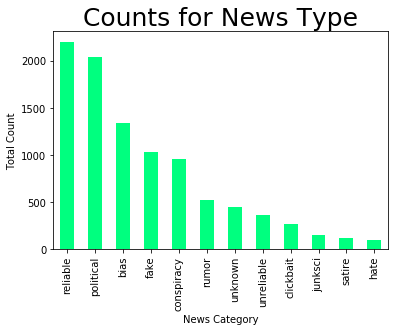

In [26]:
df.type.value_counts().plot(kind='bar', color='springgreen')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.title("Counts for News Type", fontsize=25)
plt.savefig('newstypecounts.png', bbox_inches='tight')

Text(0.5, 1.0, 'Counts for Domain')

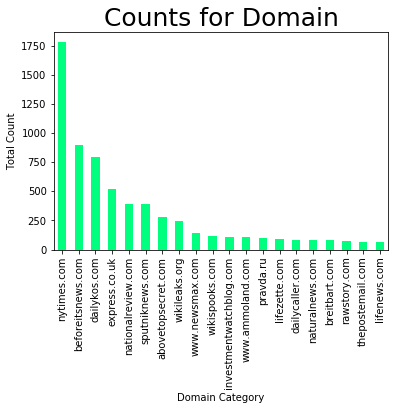

In [27]:
df.domain.value_counts().nlargest(20).plot(kind='bar', color='springgreen')
plt.xlabel('Domain Category')
plt.ylabel('Total Count')
plt.title("Counts for Domain", fontsize=25)

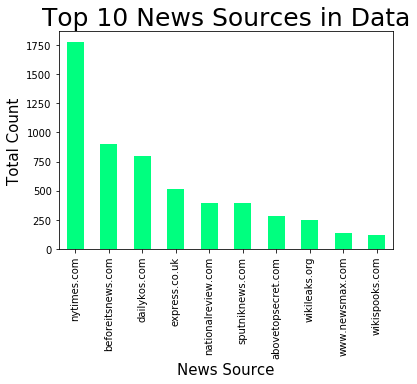

In [28]:
valcounts_domain = df.domain.value_counts()
topten_domain = valcounts_domain.head(10)
topten_domain.plot(kind='bar', color='springgreen')
plt.xlabel('News Source', fontsize=15)
plt.ylabel('Total Count', fontsize=15)
plt.title("Top 10 News Sources in Data", fontsize=25)
plt.savefig('top10newssources.png', bbox_inches='tight')

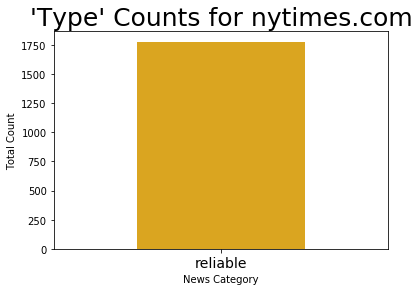

In [29]:
nytimes = df.loc[df['domain'] =='nytimes.com'] 
nytimes.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for nytimes.com", fontsize=25)
plt.savefig('nytimes.png', bbox_inches='tight')

The dataset defines every document from The New York Times as being 'reliable'.

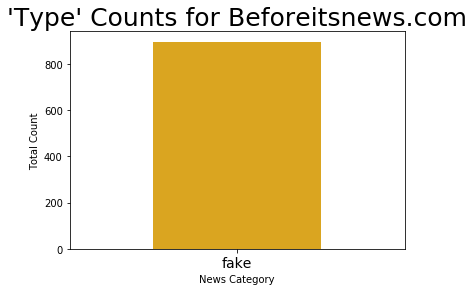

In [30]:
beforeitsnews = df.loc[df['domain'] =='beforeitsnews.com'] 
beforeitsnews.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for Beforeitsnews.com", fontsize=25)
plt.savefig('beforeitsnews.png', bbox_inches='tight')

Similarly, every single article from beforeitsnews.com is considered to be 'fake' in the dataset. 

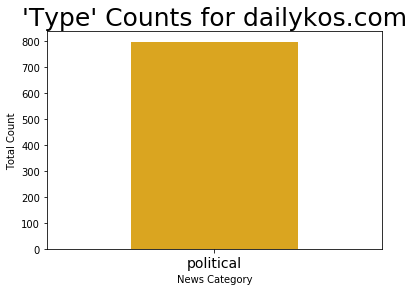

In [31]:
dailykos = df.loc[df['domain'] =='dailykos.com'] 
dailykos.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for dailykos.com", fontsize=25)
plt.savefig('dailykos.png', bbox_inches='tight')

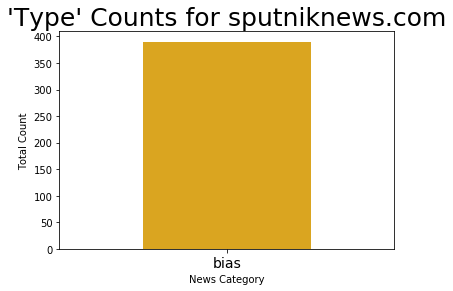

In [32]:
sputnik = df.loc[df['domain'] =='sputniknews.com'] 
sputnik.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for sputniknews.com", fontsize=25)
plt.savefig('sputnik.png', bbox_inches='tight')

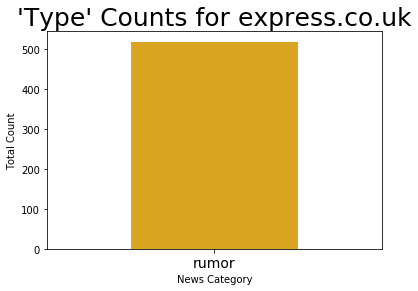

In [33]:
express = df.loc[df['domain'] =='express.co.uk'] 
express.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for express.co.uk", fontsize=25)
plt.savefig('express.co.uk.png', bbox_inches='tight')

It should be noted that there is inherent bias in this dataset from the labelling of every single article from a given source as being 'rumor', 'junksci', 'bias', or 'political', as opposed to 'reliable', as any given source will contain a wide variety of documents, with varying levels of veracity.

## Binary Classification

## 'Fake' vs. 'Reliable' news in dataset

In [34]:
df = pd.read_csv('complete_new_data.csv')

In [35]:
df.shape

(20000, 16)

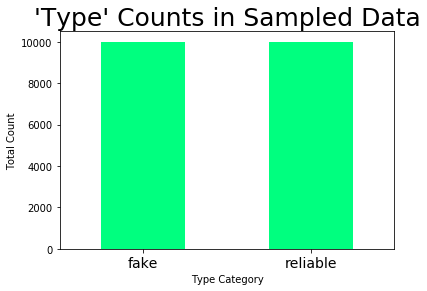

In [36]:
df.type.value_counts().plot(kind='bar', color='springgreen')
plt.xlabel('Type Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts in Sampled Data", fontsize=25)
plt.savefig('typecounts.png', bbox_inches='tight')

10,000 articles labeled 'fake' and '10,000' articles labelled 'reliable' have been sampled from the larger dataset. 

In [37]:
df.drop(['tags', 'summary', 'source'], axis=1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN
5,6916755,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2011/0...,Chinese Drywall Complaint Center Urges Florida...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Chinese Drywall Complaint Center Urges Florida...,Pr Web,NaN,[''],NaN
6,6117241,beforeitsnews.com,fake,http://beforeitsnews.com/alternative/2017/04/m...,Maine pushes to make it harder for voter initi...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Maine pushes to make it harder for voter initi...,NaN,NaN,[''],NaN
7,5146269,beforeitsnews.com,fake,http://beforeitsnews.com/vietnamese/2014/03/6-...,% of readers think this story is Fact. Add you...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,6 thông tin kinh tế nổi bật tuần từ 09/03 - 14/03,NaN,NaN,[''],NaN
8,6711496,beforeitsnews.com,fake,http://beforeitsnews.com/media/2014/11/high-re...,High-resolution geological map of asteroid Ves...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,High-resolution geological map of asteroid Ves...,The Watchers,NaN,[''],NaN
9,4215522,thenet24h.com,fake,http://thenet24h.com/20655542/story-appalachia...,The New York Times Books reviews RAMP HOLLOW b...,2017-11-27T01:15:32.269834,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"The Story of Appalachia, With Plenty of Villai...",NaN,NaN,[''],The New York Times Books reviews RAMP HOLLOW b...


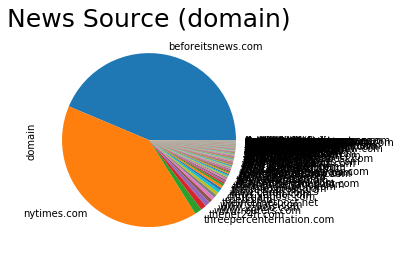

In [38]:
df.domain.value_counts().plot(kind='pie')
plt.title("News Source (domain)", fontsize=25)
plt.savefig('newssourcepie.png', bbox_inches='tight')

## Sentiment Analysis with VADER and textblob

In [39]:
fake = df[df['type']=='fake']

In [40]:
fake.shape

(10000, 16)

In [41]:
fakecontent = []
for index, row in fake.iterrows():
    fakecontent.append(row['content'])

In [42]:
print (len(fakecontent))

10000


In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for doc in fakecontent:
    pol_score = sia.polarity_scores(doc)
    pol_score['content'] = doc
    results.append(pol_score)

In [44]:
fakedf = pd.DataFrame.from_records(results)

In [45]:
fakedf['label'] = 0
fakedf.loc[fakedf['compound'] > 0.2, 'label'] = 1
fakedf.loc[fakedf['compound'] < -0.2, 'label'] = -1

In [46]:
fakedf.label.value_counts()

 1    5939
-1    3464
 0     597
Name: label, dtype: int64

In [47]:
print (fakedf['compound'].mean())

0.22222996999999992


In [48]:
print (fakedf['neg'].mean())

0.07293319999999968


In [49]:
print (fakedf['neu'].mean())

0.8347048000000006


In [50]:
print (fakedf['pos'].mean())

0.09234690000000038


In [51]:
def textblob_polarity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[0]

In [52]:
fakedf["textblob_polarity_score"] = fakedf["content"].apply(textblob_polarity_score)

In [53]:
def textblob_subjectivity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[1]

In [54]:
fakedf["textblob_subjectivity_score"] = fakedf["content"].apply(textblob_subjectivity_score)

In [55]:
fakedf['text_blob_polarity_label'] = 0
fakedf.loc[fakedf['textblob_polarity_score'] > 0.2, 'text_blob_polarity_label'] = 1
fakedf.loc[fakedf['textblob_polarity_score'] < -0.2, 'text_blob_polarity_label'] = -1

In [56]:
fakedf['text_blob_subjectivity_label'] = 0
fakedf.loc[fakedf['textblob_subjectivity_score'] > 0.55, 'text_blob_subjectivity_label'] = 1
fakedf.loc[fakedf['textblob_subjectivity_score'] < 0.45, 'text_blob_subjectivity_label'] = -1

In [57]:
fakedf[fakedf['textblob_subjectivity_score']>=.5].count()

compound                        2356
content                         2356
neg                             2356
neu                             2356
pos                             2356
label                           2356
textblob_polarity_score         2356
textblob_subjectivity_score     2356
text_blob_polarity_label        2356
text_blob_subjectivity_label    2356
dtype: int64

In [58]:
fakedf.text_blob_polarity_label.value_counts()

 0    8118
 1    1749
-1     133
Name: text_blob_polarity_label, dtype: int64

In [59]:
fakedf.text_blob_subjectivity_label.value_counts()

-1    5784
 0    3088
 1    1128
Name: text_blob_subjectivity_label, dtype: int64

In [60]:
print (fakedf['textblob_polarity_score'].mean())

0.1050328751697413


In [61]:
print (fakedf['textblob_subjectivity_score'].mean())

0.41753126695216386


In [62]:
reliable = df[df['type']=='reliable']

In [63]:
relcontent = []

In [64]:
for index, row in reliable.iterrows():
    relcontent.append(row['content'])

In [65]:
relresults = []
for doc in relcontent:
    pol_score = sia.polarity_scores(doc)
    pol_score['content'] = doc
    relresults.append(pol_score)

In [66]:
reldf = pd.DataFrame.from_records(relresults)



In [67]:
reldf['label'] = 0
reldf.loc[reldf['compound'] > 0.2, 'label'] = 1
reldf.loc[reldf['compound'] < -0.2, 'label'] = -1

In [68]:
reldf.label.value_counts()

 1    6721
-1    2581
 0     698
Name: label, dtype: int64

In [69]:
print (reldf['compound'].mean())

0.3772843899999984


In [70]:
print (reldf['neg'].mean())

0.05900119999999966


In [71]:
print (reldf['neu'].mean())

0.8484762999999974


In [72]:
print (reldf['pos'].mean())

0.09252050000000059


In [73]:
def textblob_polarity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[0]

In [74]:
reldf["textblob_polarity_score"] = reldf["content"].apply(textblob_polarity_score)

In [75]:
def textblob_subjectivity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[1]

In [76]:
reldf["textblob_subjectivity_score"] = reldf["content"].apply(textblob_subjectivity_score)

In [77]:
reldf['text_blob_polarity_label'] = 0
reldf.loc[reldf['textblob_polarity_score'] > 0.2, 'text_blob_polarity_label'] = 1
reldf.loc[reldf['textblob_polarity_score'] < -0.2, 'text_blob_polarity_label'] = -1

In [78]:
reldf['text_blob_subjectivity_label'] = 0
reldf.loc[reldf['textblob_subjectivity_score'] > 0.55, 'text_blob_subjectivity_label'] = 1
reldf.loc[reldf['textblob_subjectivity_score'] < 0.45, 'text_blob_subjectivity_label'] = -1

In [79]:
reldf[reldf['textblob_subjectivity_score']>=.5].count()

compound                        1715
content                         1715
neg                             1715
neu                             1715
pos                             1715
label                           1715
textblob_polarity_score         1715
textblob_subjectivity_score     1715
text_blob_polarity_label        1715
text_blob_subjectivity_label    1715
dtype: int64

In [80]:
reldf.text_blob_polarity_label.value_counts()

 0    8752
 1    1175
-1      73
Name: text_blob_polarity_label, dtype: int64

In [81]:
reldf.text_blob_subjectivity_label.value_counts()

-1    6800
 0    2438
 1     762
Name: text_blob_subjectivity_label, dtype: int64

In [82]:
print (reldf['textblob_polarity_score'].mean())

0.09809097950087405


In [83]:
print (reldf['textblob_subjectivity_score'].mean())

0.40756980415620375


## Predictive analysis #1

Tokenize article text.

In [84]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


In [85]:
punctuation = string.punctuation

In [86]:
def remove_punc(row):
    tokens = row.split()
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens

In [87]:
df['no_punc_content'] = df.content.apply(remove_punc)

In [88]:
ps = PorterStemmer()

def stemmed_content(row):
    content = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in content]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stemmed_content, axis=1)

df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,no_punc_content,stemmed_words
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[so, I, have, had, one, terrible, another, pos...","[so, I, have, had, one, terribl, anoth, post, ..."
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Stocks, in, Review, by, Crown, Equity, Holdin...","[stock, in, review, by, crown, equiti, hold, c..."
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Bitcoin, Blockchain, Searches, Exceed, Blockc...","[bitcoin, blockchain, search, exce, blockchain..."
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN,"[Go, for, it, The, morning, after, the, mornin...","[Go, for, it, the, morn, after, the, morn, we,..."
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN,"[Irish, bank, flight, quickens, despite, EU, r...","[irish, bank, flight, quicken, despit, EU, res..."


**Remove stop words**

In [89]:
english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

df['no_stop_stemmed'] = df.apply(remove_stop, axis=1)



df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,no_punc_content,stemmed_words,no_stop_stemmed
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[so, I, have, had, one, terrible, another, pos...","[so, I, have, had, one, terribl, anoth, post, ...","[I, one, terribl, anoth, post, one, I, plan, T..."
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Stocks, in, Review, by, Crown, Equity, Holdin...","[stock, in, review, by, crown, equiti, hold, c...","[stock, review, crown, equiti, hold, crown, eq..."
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Bitcoin, Blockchain, Searches, Exceed, Blockc...","[bitcoin, blockchain, search, exce, blockchain...","[bitcoin, blockchain, search, exce, blockchain..."
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN,"[Go, for, it, The, morning, after, the, mornin...","[Go, for, it, the, morn, after, the, morn, we,...","[Go, morn, morn, know, next, prime, minist, ba..."
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN,"[Irish, bank, flight, quickens, despite, EU, r...","[irish, bank, flight, quicken, despit, EU, res...","[irish, bank, flight, quicken, despit, EU, res..."


## Classification ##

The following steps create a predictive model using count vectorizer and multinomial Naive Bayes.  These are in individual steps.  All subsequent predictive models are made using the sklearn pipeline class. 

**1. Create Count Vectorizer**

Rejoin lists of words in the 'no_stop_stemmed' column.

In [90]:
def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

df['pre_processed_text'] = df.apply(rejoin, axis=1)

df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,no_punc_content,stemmed_words,no_stop_stemmed,pre_processed_text
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[so, I, have, had, one, terrible, another, pos...","[so, I, have, had, one, terribl, anoth, post, ...","[I, one, terribl, anoth, post, one, I, plan, T...",I one terribl anoth post one I plan To end wee...
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Stocks, in, Review, by, Crown, Equity, Holdin...","[stock, in, review, by, crown, equiti, hold, c...","[stock, review, crown, equiti, hold, crown, eq...",stock review crown equiti hold crown equiti ho...
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Bitcoin, Blockchain, Searches, Exceed, Blockc...","[bitcoin, blockchain, search, exce, blockchain...","[bitcoin, blockchain, search, exce, blockchain...",bitcoin blockchain search exce blockchain stoc...
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN,"[Go, for, it, The, morning, after, the, mornin...","[Go, for, it, the, morn, after, the, morn, we,...","[Go, morn, morn, know, next, prime, minist, ba...",Go morn morn know next prime minist bank canad...
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN,"[Irish, bank, flight, quickens, despite, EU, r...","[irish, bank, flight, quicken, despit, EU, res...","[irish, bank, flight, quicken, despit, EU, res...",irish bank flight quicken despit EU rescu depo...


In [91]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [92]:
df = df.dropna(subset=['type'])

In [93]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [94]:
y = df.type

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df['pre_processed_text'], y, test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

In [96]:
count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [97]:
print(count_vectorizer.get_feature_names()[:100])

['aa', 'aaa', 'aab', 'aabgu', 'aac', 'aachen', 'aadmi', 'aadvantag', 'aae', 'aafia', 'aafp', 'aagot', 'aakash', 'aakrosh', 'aal', 'aalborg', 'aalim', 'aaltci', 'aalto', 'aam', 'aaman', 'aamaq', 'aamer', 'aamet', 'aamir', 'aamoth', 'aan', 'aanbevel', 'aanbevelingen', 'aantoonbaar', 'aap', 'aapl', 'aar', 'aardman', 'aarhu', 'aaron', 'aaronson', 'aarp', 'aasan', 'aastrom', 'aau', 'aav', 'ab', 'aba', 'ababa', 'ababneh', 'aback', 'abacu', 'abaddon', 'abadi', 'abadin', 'abadiânia', 'abagnal', 'abaixo', 'abalamo', 'abalo', 'abalon', 'abandon', 'abash', 'abasi', 'abat', 'abatti', 'abattoir', 'abaya', 'abb', 'abba', 'abbado', 'abbeel', 'abbey', 'abbi', 'abbot', 'abbott', 'abboud', 'abbrevi', 'abbruzzes', 'abbvi', 'abc', 'abcam', 'abd', 'abdallah', 'abdel', 'abdelatti', 'abdelhakim', 'abdeljab', 'abdellatif', 'abdelmonem', 'abdelrahman', 'abderakhman', 'abderrahim', 'abdeslam', 'abdessalaam', 'abdi', 'abdiasi', 'abdic', 'abdikadir', 'abdin', 'abdirahman', 'abdirisak', 'abdisamad', 'abdomen']


**Train and test the model**

In [98]:
nb_classifier = MultinomialNB()


nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)


score = metrics.accuracy_score(y_test, pred)
print(score)

0.8671212121212121


In [101]:
def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [102]:
show_most_informative_features(count_vectorizer, nb_classifier)

	-14.1713	aac            		-4.2017	wa             
	-14.1713	aae            		-4.5269	hi             
	-14.1713	aafia          		-4.6422	ha             
	-14.1713	aafp           		-4.6732	new            
	-14.1713	aakash         		-4.7910	said           
	-14.1713	aaltci         		-5.0097	thi            
	-14.1713	aamer          		-5.2696	continu        
	-14.1713	aamet          		-5.3058	stori          
	-14.1713	aamir          		-5.3252	read           
	-14.1713	aan            		-5.3520	main           
	-14.1713	aanbevel       		-5.3822	york           
	-14.1713	aanbevelingen  		-5.3951	pleas          
	-14.1713	aantoonbaar    		-5.4519	like           
	-14.1713	aastrom        		-5.4638	time           
	-14.1713	aav            		-5.6148	sign           
	-14.1713	aba            		-5.7596	advertis       
	-14.1713	ababa          		-5.7871	year           
	-14.1713	ababneh        		-5.8000	newslett       
	-14.1713	abaddon        		-5.8677	peopl          
	-14.1713	abadi          		-5.8

**Same but with tf-idf**

Use sklearn pipeline to create model using tf-idf vectorizer.

In [103]:
class pre_process(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def transform(self, X, y=None):
        
        def proc(z):
            text = z.split()
            text =  [w for w in text if w.isalpha()]
            text = [w for w in text if w not in punctuation]
            text = [ps.stem(word) for word in text]
            text = [w for w in text if w not in english_stopwords]
            text = " ".join(text)
            return text
        z = X.apply(proc)        
        return z
    def fit(self, df, y=None):
        return self

In [104]:
tfidf_pineline = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer()),
              ('clf',   MultinomialNB())])

In [105]:
tfidf_pineline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [106]:
tfidf_pineline.score(X_test,y_test)

0.8722727272727273

This can also be done without using a pipeline. Steps are repeated below in order to make use of the sbow_most_informative_features() function.

In [107]:
tfidf_vect = TfidfVectorizer()

X_tfidf_train = tfidf_vect.fit_transform(X_train)

X_tfidf_test = tfidf_vect.transform(X_test)

nb_classifier.fit(X_tfidf_train, y_train)
pred = nb_classifier.predict(X_tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.8727272727272727


In [108]:
show_most_informative_features(tfidf_vect, nb_classifier)

	-11.6985	aac            		-5.9844	wa             
	-11.6985	aae            		-6.1042	hi             
	-11.6985	aafia          		-6.3211	said           
	-11.6985	aafp           		-6.3276	new            
	-11.6985	aakash         		-6.4197	ha             
	-11.6985	aaltci         		-6.6915	york           
	-11.6985	aamer          		-6.7462	pleas          
	-11.6985	aamet          		-6.7603	main           
	-11.6985	aamir          		-6.7821	continu        
	-11.6985	aan            		-6.8009	thi            
	-11.6985	aanbevel       		-6.8678	would          
	-11.6985	aanbevelingen  		-6.9342	read           
	-11.6985	aantoonbaar    		-6.9534	one            
	-11.6985	aastrom        		-6.9579	sign           
	-11.6985	aav            		-6.9654	stori          
	-11.6985	aba            		-7.0101	he             
	-11.6985	ababa          		-7.0372	newslett       
	-11.6985	ababneh        		-7.0506	time           
	-11.6985	abaddon        		-7.0680	up             
	-11.6985	abadi          		-7.0

**Tf-idf with bigrams**

In [109]:
tfidf_pineline_w_bigrams = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer(ngram_range=(2,2))),
              ('clf',   MultinomialNB())])

In [110]:
tfidf_pineline_w_bigrams.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [111]:
tfidf_pineline_w_bigrams.score(X_test,y_test)

0.905

In [112]:
tfidf_pineline_w_trigrams = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer(ngram_range=(3,3))),
              ('clf',   MultinomialNB())])

In [113]:
tfidf_pineline_w_trigrams.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(3, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [114]:
tfidf_pineline_w_trigrams.score(X_test,y_test)

0.875

What is the accuracy of using an SVM model with tfidf-vectorization?

In [115]:
tfidf_pineline_w_bigrams_SVC = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer(ngram_range=(2,2))),
              ('clf',     LinearSVC())])

In [116]:
tfidf_pineline_w_bigrams_SVC.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=T

In [117]:
tfidf_pineline_w_bigrams_SVC.score(X_test,y_test)

0.9177272727272727

In [118]:
tfidf_pineline_w_bigrams_xgb = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer(ngram_range=(2,2))),
              ('clf',     XGBClassifier())])

In [119]:
tfidf_pineline_w_bigrams_xgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_t...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child

In [120]:
tfidf_pineline_w_bigrams_xgb.score(X_test,y_test)

0.8333333333333334

The td-idf vectorizer with SVM was the most accurate.  It is implemented below without the sklearn pipeline to get the most informative features. 

In [121]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))

In [122]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)

In [123]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)

In [124]:
linsvc =     LinearSVC()

In [125]:
linsvc.fit(X_tfidf__bigrams_train, y_train)
pred = linsvc.predict(X_tfidf__bigrams_test)

In [126]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.9172727272727272


In [127]:
show_most_informative_features(tfidf_vect_bigrams, linsvc)

	-4.5960	think thi      		6.2862	main stori     
	-4.5277	add two        		6.2685	read main      
	-4.5130	stori add      		5.9580	advertis continu
	-4.5052	reader think   		5.6588	continu read   
	-4.4259	thi stori      		4.7699	new york       
	-2.7212	appear first   		4.2447	to re          
	-2.6345	bitcoin blockchain		2.3737	an articl      
	-2.6103	blockchain search		1.9920	next in        
	-2.6103	blockchain stock		1.7252	said would     
	-2.6103	exce blockchain		1.6790	belov husband  
	-2.6103	search exce    		1.4953	he wa          
	-1.4449	tea parti      		1.4365	said wa        
	-1.2497	thi articl     		1.4229	view photo     
	-1.2348	year old       		1.4056	wife late      
	-1.2196	read full      		1.4014	belov wife     
	-1.1884	mainstream media		1.3212	thomson reuter 
	-1.1396	thi one        		1.3148	becaus edit    
	-1.1156	thi mean       		1.3007	in lieu        
	-1.1107	presid donald  		1.2746	associ press   
	-1.1003	thi video      		1.2613	servic held    
	-1.0742	man

The above results show that bigrams relating directly to the newspaper the New York Times are most predictive.  This is problematic because we want the classifier to predict whether an article is fake or reliable -- not whether it appeared in the New York Times.

Thus, the data can be resampled. 

Let's try to undersample the data, so that fewer articles from the New York Times are in the dataset. 

### Predictive Analysis with domain considered

In [128]:
df.type.value_counts()

fake        10000
reliable    10000
Name: type, dtype: int64

In [129]:
df.domain.value_counts()

beforeitsnews.com              8733
nytimes.com                    8057
threepercenternation.com        267
thenet24h.com                   210
www.reuters.com                 187
www.yahoo.com                   133
www.sfgate.com                  121
theinternetpost.net             115
coed.com                        113
christianpost.com               107
news.yahoo.com                   93
www.chron.com                    93
thefreepatriot.org               84
indianexpress.com                60
thetruthdivision.com             57
uk.finance.yahoo.com             55
www.huffingtonpost.com           52
newswithviews.com                49
therightscoop.com                46
abcnews.go.com                   44
www.msn.com                      44
uk.reuters.com                   43
sports.yahoo.com                 42
nutritionfacts.org               39
consortiumnews.com               33
www.theguardian.com              32
realnewsrightnow.com             31
www.businessinsider.com     

NYT and Beforeitsnews are vastly overrepresented in the data. Let's preform undersampling.

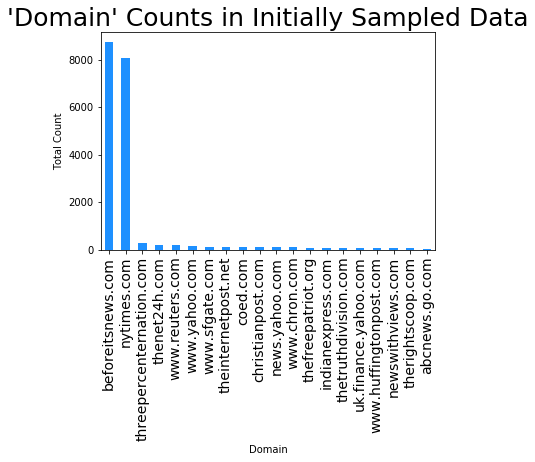

In [130]:
df.domain.value_counts().nlargest(20).plot(kind='bar', color='dodgerblue')
plt.xlabel('Domain')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=90)
plt.title("'Domain' Counts in Initially Sampled Data", fontsize=25)
plt.savefig('domaincounts.png', bbox_inches='tight')

NYT and Beforeitsnews are vastly overrepresented in the data. Let's preform undersampling.

In [131]:
nyt = df[df['domain'] == "nytimes.com"]

In [132]:
nyt_sample = nyt.sample(100)

In [133]:
mask = df['domain'].isin(['nytimes.com', 'beforeitsnews.com'])
newdf = df[~mask]

In [134]:
bef = df[df['domain'] == "beforeitsnews.com"]

In [135]:
bef_sample = bef.sample(100)

In [136]:
df_undersampling = pd.concat([newdf, nyt_sample, bef_sample], axis=0)

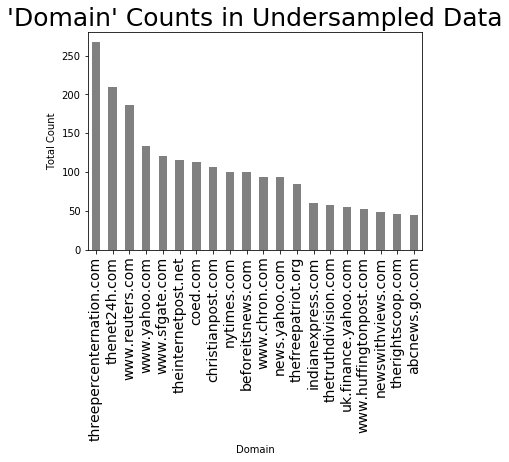

In [137]:
df_undersampling.domain.value_counts().nlargest(20).plot(kind='bar', color='grey')
plt.xlabel('Domain')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=90)
plt.title("'Domain' Counts in Undersampled Data", fontsize=25)
plt.savefig('domaincounts_under.png', bbox_inches='tight')

In [138]:
df_undersampling.shape

(3410, 20)

In [139]:
y = df_undersampling['type']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df_undersampling['content'], y, test_size=0.33, random_state=53)



In [141]:
pipeline_countvect_linsvc = Pipeline([('preproc', pre_process()),
              ('ngram', CountVectorizer(ngram_range=(1, 4), analyzer='char')),
              ('clf',   LinearSVC())])

In [142]:
pipeline_countvect_linsvc.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('ngram',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 4), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_sta

In [143]:
pipeline_countvect_linsvc.score(X_test,y_test)

0.7895204262877442

In [144]:
pipeline_countvect_multNB = Pipeline([('preproc', pre_process()),
              ('ngram', CountVectorizer()),
              ('clf',   MultinomialNB())])

In [145]:
pipeline_countvect_multNB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('ngram',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [146]:
pipeline_countvect_multNB.score(X_test,y_test)

0.7948490230905861

In [147]:
pipeline_tfidf_multNB = Pipeline([('preproc', pre_process()),
              ('tfidf', TfidfVectorizer()),
              ('clf',   MultinomialNB())])

In [148]:
pipeline_tfidf_multNB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [149]:
pipeline_tfidf_multNB.score(X_test,y_test)

0.6660746003552398

In [150]:
pipeline_tfidf_linsvc = Pipeline([
              ('tfidf_vect', TfidfVectorizer()),
              ('clf',   LinearSVC())])

In [151]:
pipeline_tfidf_linsvc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [152]:
pipeline_tfidf_linsvc.score(X_test,y_test)

0.8596802841918295

In [153]:
pipeline_tfidfbigrams_linsvc = Pipeline([
              ('tfidf_vect', TfidfVectorizer(ngram_range=(2,2))),
              ('clf',   LinearSVC())])

In [154]:
pipeline_tfidfbigrams_linsvc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [155]:
pipeline_tfidfbigrams_linsvc.score(X_test,y_test)

0.8214920071047958

The most accurate model with tf-idf with linear SVC, with no additional preprocessing step.  Here is it without a pipeline to examine the most important features. 

In [156]:
tfidf_vect = TfidfVectorizer()

X_tfidf_train = tfidf_vect.fit_transform(X_train)

X_tfidf_test = tfidf_vect.transform(X_test)

In [157]:
linSVCclf = LinearSVC()

In [158]:
linSVCclf.fit(X_tfidf_train, y_train)
pred = linSVCclf.predict(X_tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.8596802841918295


In [159]:
show_most_informative_features(tfidf_vect, linSVCclf)

	-2.0390	this           		2.8079	2016           
	-1.6259	obama          		2.2152	ap             
	-1.5873	advertisements 		2.0724	nov            
	-1.3236	is             		2.0419	november       
	-1.1130	facebook       		1.9778	in             
	-1.0857	gun            		1.8648	said           
	-1.0819	brown          		1.6951	photo          
	-1.0330	here           		1.4721	reuters        
	-1.0150	terrorist      		1.2713	says           
	-0.9964	girl           		1.2561	election       
	-0.9877	christmas      		1.2194	main           
	-0.9633	oregon         		1.1893	with           
	-0.9384	you            		1.1569	at             
	-0.9293	reddit         		1.1285	but            
	-0.9266	censoring      		1.1249	love           
	-0.9123	ever           		1.0895	season         
	-0.8998	american       		1.0852	related        
	-0.8966	believe        		1.0783	film           
	-0.8891	fact           		1.0713	tuesday        
	-0.8848	if             		1.0669	by             
	-0.8626	loading    

**Tf-idf with bigrams**

In [160]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))

In [161]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)

In [162]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)

In [163]:
linSVCclf.fit(X_tfidf__bigrams_train, y_train)
pred = linSVCclf.predict(X_tfidf__bigrams_test)

In [164]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.8214920071047958


In [165]:
show_most_informative_features(tfidf_vect_bigrams, nb_classifier)

	-11.6985	00 09          		-5.9844	best was       
	-11.6985	00 17          		-6.1042	also divide    
	-11.6985	00 18          		-6.3211	attack ibrahim 
	-11.6985	00 19          		-6.3276	any risks      
	-11.6985	00 41          		-6.4197	allegations by 
	-11.6985	00 54          		-6.6915	bitter when    
	-11.6985	00 7036        		-6.7462	arrested html  
	-11.6985	00 am          		-6.7603	and nitrogen   
	-11.6985	00 and         		-6.7821	71 as          
	-11.6985	00 eastern     		-6.8009	bearing lipstick
	-11.6985	00 est         		-6.8678	billed as      
	-11.6985	00 et          		-6.9342	asleep love    
	-11.6985	00 excepting   		-6.9534	april gifted   
	-11.6985	00 oct         		-6.9579	back to        
	-11.6985	00 pbs         		-6.9654	based pair     
	-11.6985	00 pm          		-7.0101	alone would    
	-11.6985	00 priceline   		-7.0372	any threat     
	-11.6985	00 pst         		-7.0506	became their   
	-11.6985	00 scott       		-7.0680	being most     
	-11.6985	00 should      		-7.

## multi-class classification

In [166]:
df = pd.read_csv('newly_sampled_data.csv')

Text(0.5, 1.0, "'Type' Counts in Initally Sampled Data")

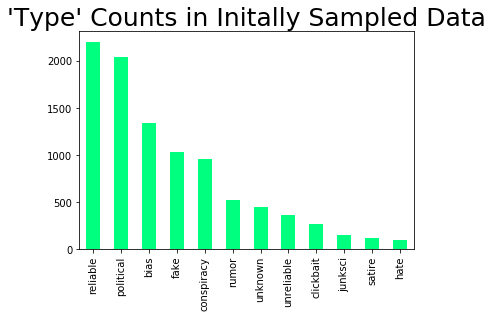

In [167]:
df.type.value_counts().plot(kind='bar',color='springgreen')
plt.title("'Type' Counts in Initally Sampled Data", fontsize=25)

Take the top four categories to make a new df. 

In [168]:
fake_new_df = df[df['type']== 'fake'].sample(n=1000, random_state=0)

bias_new_df = df[df['type']== 'bias'].sample(n=1000, random_state=0)

political_new_df = df[df['type']== 'political'].sample(n=1000, random_state=0)

reliable_new_df = df[df['type']== 'reliable'].sample(n=1000, random_state=0)

new_df = pd.concat([fake_new_df, reliable_new_df,bias_new_df,political_new_df])

Text(0.5, 1.0, "New 'Type' Counts in Sampled Data")

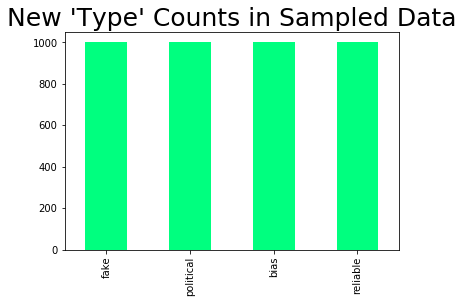

In [169]:
new_df.type.value_counts().plot(kind='bar',color='springgreen')
plt.title("New 'Type' Counts in Sampled Data", fontsize=25)

In [170]:
new_df.head()

y = new_df.type

X_train, X_test, y_train, y_test = train_test_split(new_df['content'], y, test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.6757575757575758


In [171]:
labels = ['fake','political','reliable','bias']

In [172]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test, pred,  labels=labels), 
    index=['true:fake', 'true:political','true:reliable','true:bias' ], 
    columns=['pred:fake', 'pred:political', 'pred:reliable', 'pred:bias']
)
print(cmtx)

                pred:fake  pred:political  pred:reliable  pred:bias
true:fake             198              64             22          6
true:political         43             252             30         10
true:reliable          35              42            267          3
true:bias              51             107             15        175


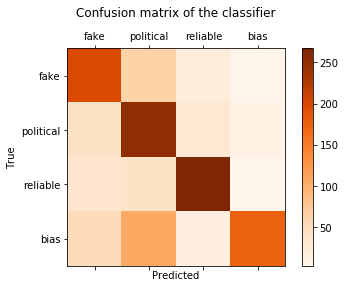

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmtx,cmap='Oranges')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
fig.colorbar(cax)
plt.title('Confusion matrix of the classifier'+ "\n")
plt.savefig('conf_matrx.png', bbox_inches='tight')

In [174]:
tfidf_vect = TfidfVectorizer()



In [175]:
count_train = tfidf_vect.fit_transform(X_train)

count_test = tfidf_vect.transform(X_test)

In [176]:
linSVCclf = LinearSVC()

In [177]:

linSVCclf.fit(count_train, y_train)
pred = linSVCclf.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.7196969696969697


In [178]:
labels = ['fake','political','reliable','bias']
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test, pred,  labels=labels), 
    index=['true:fake', 'true:political','true:reliable','true:bias' ], 
    columns=['pred:fake', 'pred:political', 'pred:reliable', 'pred:bias']
)
print(cmtx)

                pred:fake  pred:political  pred:reliable  pred:bias
true:fake             223              27             18         22
true:political         39             217             31         48
true:reliable          16              29            282         20
true:bias              33              64             23        228


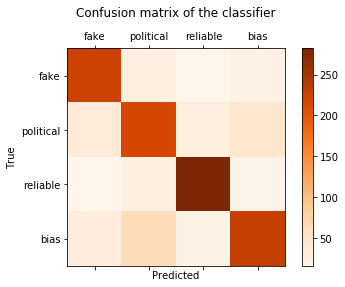

In [179]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmtx,cmap='Oranges')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
fig.colorbar(cax)
plt.title('Confusion matrix of the classifier'+ "\n")
plt.savefig('conf_matrx.png', bbox_inches='tight')

### What happens when all of the original labels from the dataset are included in the classifier (not only 'fake','political','reliable','bias', but all of them)?

In [180]:
df = pd.read_csv('newly_sampled_data.csv')

In [181]:
df.shape

(10000, 16)

In [182]:
df = df[pd.notnull(df['content'])]

In [183]:
df = df[pd.notnull(df['type'])]

In [184]:
df.shape

(9528, 16)

Text(0.5, 1.0, "'Type' Counts in Initally Sampled Data")

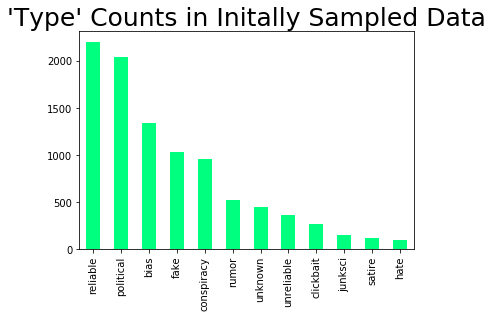

In [185]:
df.type.value_counts().plot(kind='bar',color='springgreen')
plt.title("'Type' Counts in Initally Sampled Data", fontsize=25)

In [186]:
df.type.value_counts()

reliable      2201
political     2040
bias          1342
fake          1031
conspiracy     954
rumor          523
unknown        449
unreliable     364
clickbait      268
junksci        145
satire         118
hate            93
Name: type, dtype: int64

In [187]:
y = df.type

X_train, X_test, y_train, y_test = train_test_split(df['content'], y, test_size=0.20, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.6138509968520461


In [188]:
labels = ['reliable','political','bias','fake','conspiracy','rumor','unknown','unreliable','clickbait','junksci','satire','hate']

In [189]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test, pred,  labels=labels), 
    index=['true:reliable', 'true:political','true:bias','true:fake','true:conspiracy','true:rumor','true:unknown','true:unreliable', 'true:clickbait','true:junksci','true:satire','true:hate'], 
    columns=['pred:reliable', 'pred:political', 'pred:bias', 'pred:fake','pred:conspiracy','pred:rumor','pred:unknown','pred:unreliable','pred:clickbait','pred:junksci','pred:satire','pred:hate']
)
print(cmtx)

                 pred:reliable  pred:political  pred:bias  pred:fake  \
true:reliable              388              55          8          9   
true:political              44             313         13          9   
true:bias                   17              80        143         10   
true:fake                   29              53          3        113   
true:conspiracy             13              57         13         19   
true:rumor                  44              15          2          2   
true:unknown                12              31         12          9   
true:unreliable              4              16          3          4   
true:clickbait              12              35          1          2   
true:junksci                 6               1          0         12   
true:satire                 10               5          0          3   
true:hate                    4              10          1          0   

                 pred:conspiracy  pred:rumor  pred:unknown  pre

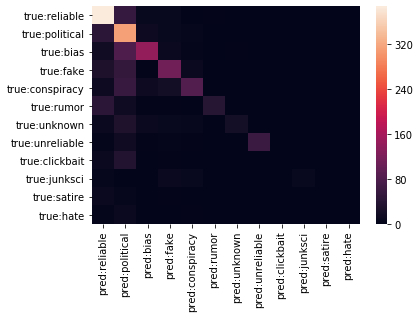

In [190]:
sns.heatmap(cmtx)
